In [354]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import os
import pickle
import ast
import numpy as np
import matplotlib.pyplot as plt

In [167]:
base_path = f"{os.path.dirname(os.getcwd())}\\data"

In [168]:
base_path

'c:\\Users\\myras\\Documents\\MYMY\\ACADS\\AY 2023-2024 1ST SEM\\Stat280_Practical_ML\\project\\Fragrance_Advisor\\data'

In [169]:
df = pd.read_excel(f"{base_path}\\input\\content-based-data.xlsx")
df.head()

,url,fragrance,brand,perfumer,sex,rating,scent,longevity,sillage,bottle,value_for_money,main_accords,notes,top_notes,heart_notes,base_notes,all_reviews
0,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Vanilla,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Vanilla blossom'],NaN,NaN,NaN,NaN
1,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Tropical,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Palm tree', 'Tropical fruits']",NaN,NaN,NaN,NaN
2,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Rose,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Rose'],NaN,NaN,NaN,NaN
3,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Marigold,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Floral notes'],NaN,NaN,NaN,NaN
4,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Cotton,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Cotton flower'],NaN,NaN,NaN,NaN


In [170]:
def get_fragrance_identifier(x):
    try:
        link_elements = x.split("/")
        return f"{link_elements[-1]} by {link_elements[-2]}"
    except:
        return ""

In [171]:
df["fragrance_identifier"] = df["url"].apply(get_fragrance_identifier)

In [172]:
df.head()

,url,fragrance,brand,perfumer,sex,rating,scent,longevity,sillage,bottle,value_for_money,main_accords,notes,top_notes,heart_notes,base_notes,all_reviews,fragrance_identifier
0,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Vanilla,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Vanilla blossom'],NaN,NaN,NaN,NaN,vanilla by zoya-cosmetics
1,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Tropical,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Palm tree', 'Tropical fruits']",NaN,NaN,NaN,NaN,tropical by zoya-cosmetics
2,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Rose,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Rose'],NaN,NaN,NaN,NaN,rose by zoya-cosmetics
3,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Marigold,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Floral notes'],NaN,NaN,NaN,NaN,marigold by zoya-cosmetics
4,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Cotton,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Cotton flower'],NaN,NaN,NaN,NaN,cotton-eau-de-toilette by zoya-cosmetics


In [8]:
df = df[["fragrance_identifier", "main_accords"]]
df = df[~df['main_accords'].isna()]
df.head()

,fragrance_identifier,main_accords
2,CrazyGirl by Parfums_Hashtag,"['Fruity', 'Sweet']"
7,Rockit by Parfums_Hashtag,"['Sweet', 'Spicy', 'Fruity', 'Floral', 'Resino..."
8,Arabesque_Wood_Body_Mist by And_Other_Stories,"['Citrus', 'Spicy', 'Oriental', 'Woody', 'Fresh']"
9,Arabesque_Wood_Eau_de_Toilette by And_Other_St...,"['Fresh', 'Citrus', 'Woody', 'Spicy', 'Green']"
13,avant-garde-air-perfume-oil by And_Other_Stories,"['Sweet', 'Floral']"


In [173]:
df.drop_duplicates(inplace=True)

In [174]:
df.fragrance_identifier.value_counts().sort_values(ascending=False) # unique identifiers! OK!

Ungaro_pour_L_Homme_II_Eau_de_Toilette by Emanuel_Ungaro    1
flaming-pumpkin by Nui_Cobalt_Designs                       1
80_Datura by AuraSoma                                       1
L_Eau_d_Armoise by Serge_Lutens                             1
al-jawhar by Amouage                                        1
                                                           ..
Musk_for_Men_Tropical_Musk by Jovan                         1
Ginger_Spice by A_Wing__A_Prayer_Perfumes                   1
Creamy_Dessert by Jessica_Simpson                           1
musc-halima-extrait-de-parfum by El_Nabil                   1
m-m-eau-de-toilette-m-2-m by Molinard                       1
Name: fragrance_identifier, Length: 81898, dtype: int64

In [175]:
df.shape

(81898, 18)

In [176]:
# get only top 5 accords
def top_accords(x):
    try:
        return ast.literal_eval(x)[:5]
    except:
        return []

In [177]:
df['top_5_accords'] = df['main_accords'].apply(top_accords)
df.head()

,url,fragrance,brand,perfumer,sex,rating,scent,longevity,sillage,bottle,value_for_money,main_accords,notes,top_notes,heart_notes,base_notes,all_reviews,fragrance_identifier,top_5_accords
0,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Vanilla,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Vanilla blossom'],NaN,NaN,NaN,NaN,vanilla by zoya-cosmetics,[]
1,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Tropical,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Palm tree', 'Tropical fruits']",NaN,NaN,NaN,NaN,tropical by zoya-cosmetics,[]
2,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Rose,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Rose'],NaN,NaN,NaN,NaN,rose by zoya-cosmetics,[]
3,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Marigold,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Floral notes'],NaN,NaN,NaN,NaN,marigold by zoya-cosmetics,[]
4,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Cotton,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Cotton flower'],NaN,NaN,NaN,NaN,cotton-eau-de-toilette by zoya-cosmetics,[]


In [178]:
accords_list = []
for i in df["top_5_accords"]:
    accords_list.extend(i)
accords_list = list(set(accords_list))
accords_list

['Fresh',
 'Resinous',
 'Fougère',
 'Powdery',
 'Earthy',
 'Animal',
 'Floral',
 'Oriental',
 'Spicy',
 'Fruity',
 'Creamy',
 'Gourmand',
 'Aquatic',
 'Leathery',
 'Green',
 'Synthetic',
 'Woody',
 'Smoky',
 'Sweet',
 'Chypre',
 'Citrus']

In [179]:
len(accords_list)

21

In [180]:
def get_accord_rank(x, accord):
    try:
        return 5 - x.index(accord)
    except:
        return -1

In [183]:
for accord in accords_list:
    df[accord] = df["top_5_accords"].apply(lambda x: get_accord_rank(x, accord))
df.head()

,url,fragrance,brand,perfumer,sex,rating,scent,longevity,sillage,bottle,...,Gourmand,Aquatic,Leathery,Green,Synthetic,Woody,Smoky,Sweet,Chypre,Citrus
0,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Vanilla,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Tropical,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Rose,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Marigold,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,https://www.parfumo.com/Perfumes/zoya-cosmetic...,Cotton,Zoya Cosmetics,NaN,Female,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Content-based

In [184]:
X = df[["fragrance_identifier"] + accords_list]
X.set_index('fragrance_identifier', inplace=True)
X.head()

,Fresh,Resinous,Fougère,Powdery,Earthy,Animal,Floral,Oriental,Spicy,Fruity,...,Gourmand,Aquatic,Leathery,Green,Synthetic,Woody,Smoky,Sweet,Chypre,Citrus
fragrance_identifier,,,,,,,,,,,,,,,,,,,,,
vanilla by zoya-cosmetics,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
tropical by zoya-cosmetics,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
rose by zoya-cosmetics,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
marigold by zoya-cosmetics,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
cotton-eau-de-toilette by zoya-cosmetics,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [185]:
X.shape

(81898, 21)

In [186]:
N_predicted_neighbours = 11 # top 10 itself. because the nearest distance is itself
KNN = NearestNeighbors(metric='cosine', n_neighbors=N_predicted_neighbours, n_jobs=-1)

In [187]:
KNN.fit(X)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=11)

In [188]:
with open(f'{base_path}\\output\\content_based_model.pkl','wb') as f:
    pickle.dump(KNN, f)

In [358]:
def pred(x):
    x_input = [get_accord_rank(x, accord) for accord in accords_list]
    distances, indices = KNN.kneighbors([x_input])
    return df.iloc[indices[0]][["fragrance_identifier", "main_accords", "top_5_accords"]]

In [ ]:
# if your most appealing scents are ["Citrus", "Spicy", "Fresh", "Floral", "Green"], we recommend...

In [362]:
pred(["Citrus", "Spicy", "Fresh", "Floral", "Green"])

c:\Users\myras\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


,fragrance_identifier,main_accords,top_5_accords
23707,Douro_Eau_de_Portugal by Penhaligons,"['Citrus', 'Spicy', 'Fresh', 'Floral', 'Green']","[Citrus, Spicy, Fresh, Floral, Green]"
55937,Spigo_1920 by Bois_1920,"['Citrus', 'Spicy', 'Fresh', 'Floral', 'Green']","[Citrus, Spicy, Fresh, Floral, Green]"
43473,Selection_Eau_de_Toilette by Gerard_Danfre,"['Citrus', 'Spicy', 'Fresh', 'Floral', 'Green']","[Citrus, Spicy, Fresh, Floral, Green]"
2905,lavender-citrus by niche-4-all,"['Citrus', 'Fresh', 'Spicy', 'Floral', 'Green']","[Citrus, Fresh, Spicy, Floral, Green]"
20366,acqua-della-regina by Santa_Maria_Novella,"['Citrus', 'Fresh', 'Spicy', 'Floral', 'Green']","[Citrus, Fresh, Spicy, Floral, Green]"
34015,Cologne_Nocturne by Le_Galion,"['Citrus', 'Spicy', 'Floral', 'Fresh', 'Green']","[Citrus, Spicy, Floral, Fresh, Green]"
32183,Jeune_Homme_Eau_pour_le_Jeune_Homme by Maitre_...,"['Citrus', 'Fresh', 'Spicy', 'Floral', 'Green']","[Citrus, Fresh, Spicy, Floral, Green]"
38370,Eau_de_Patou by Jean_Patou,"['Citrus', 'Spicy', 'Floral', 'Fresh', 'Green']","[Citrus, Spicy, Floral, Fresh, Green]"
43649,Wellington_Cologne by Geo_F_Trumper,"['Citrus', 'Fresh', 'Spicy', 'Floral', 'Green']","[Citrus, Fresh, Spicy, Floral, Green]"
40002,n-11-de-sacha-eau-de-parfum by Henry_Jacques,"['Citrus', 'Spicy', 'Fresh', 'Green', 'Floral']","[Citrus, Spicy, Fresh, Green, Floral]"


In [361]:
pred(["Aquatic", "Fresh", "Citrus", "Synthetic", "Spicy"])

c:\Users\myras\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


,fragrance_identifier,main_accords,top_5_accords
42706,acqua-di-gio-profondo by Giorgio_Armani,"['Aquatic', 'Fresh', 'Citrus', 'Synthetic', 'S...","[Aquatic, Fresh, Citrus, Synthetic, Spicy]"
49216,Cool_Water_Ocean_Extreme by Davidoff,"['Aquatic', 'Fresh', 'Citrus', 'Synthetic', 'S...","[Aquatic, Fresh, Citrus, Synthetic, Spicy]"
22527,Polo_Ultra_Blue by Ralph_Lauren,"['Aquatic', 'Fresh', 'Citrus', 'Synthetic', 'S...","[Aquatic, Fresh, Citrus, Synthetic, Spicy]"
79649,Classica_Uomo_Eau_de_Parfum by Acqua_dellElba,"['Aquatic', 'Citrus', 'Fresh', 'Synthetic', 'S...","[Aquatic, Citrus, Fresh, Synthetic, Spicy]"
39103,hugo-now by Hugo_Boss,"['Fresh', 'Aquatic', 'Citrus', 'Synthetic', 'S...","[Fresh, Aquatic, Citrus, Synthetic, Spicy]"
22440,kokain-seemann-intense by Rammstein,"['Aquatic', 'Fresh', 'Citrus', 'Spicy', 'Synth...","[Aquatic, Fresh, Citrus, Spicy, Synthetic]"
49146,cool-water-aquaman-collector-edition by Davidoff,"['Fresh', 'Aquatic', 'Citrus', 'Synthetic', 'S...","[Fresh, Aquatic, Citrus, Synthetic, Spicy]"
14795,Versace_pour_Homme_Dylan_Blue_Eau_de_Toilette ...,"['Fresh', 'Aquatic', 'Citrus', 'Synthetic', 'S...","[Fresh, Aquatic, Citrus, Synthetic, Spicy]"
62863,Air by Axe,"['Aquatic', 'Fresh', 'Synthetic', 'Citrus', 'S...","[Aquatic, Fresh, Synthetic, Citrus, Spicy]"
53433,Aqva_pour_Homme_Atlantiqve by Bvlgari,"['Aquatic', 'Fresh', 'Synthetic', 'Citrus', 'S...","[Aquatic, Fresh, Synthetic, Citrus, Spicy]"


## User-based

In [305]:
user_df = pd.read_excel(f"{base_path}\\input\\user-based-data.xlsx")
user_df.head()

,user,i_have,i_had,wish_list,watch_list,tested
0,Brologne,"['1 Million (Eau de Toilette)', '1 Million Luc...",['Rawan'],NaN,NaN,['Joop! Homme (Eau de Toilette)']
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",NaN,['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",NaN,"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon']
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi..."


In [306]:
user_df.shape

(2583, 6)

In [307]:
user_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        2583 non-null   object
 1   i_have      2317 non-null   object
 2   i_had       1881 non-null   object
 3   wish_list   1622 non-null   object
 4   watch_list  1284 non-null   object
 5   tested      1935 non-null   object
dtypes: object(6)
memory usage: 121.2+ KB


c:\Users\myras\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [308]:
user_df.user.value_counts().sort_values(ascending=False) # all unique cutomerIDs, OK!

Schnupperl      1
Bukett          1
Yeth            1
Velamint        1
Alex0127        1
               ..
Vikifox         1
Veilchen        1
Schnüfflerin    1
Dulcemio        1
DuftFlasher     1
Name: user, Length: 2583, dtype: int64

In [309]:
user_df = user_df[["user", "i_have", "i_had", "wish_list", "watch_list", "tested"]]
user_df

,user,i_have,i_had,wish_list,watch_list,tested
0,Brologne,"['1 Million (Eau de Toilette)', '1 Million Luc...",['Rawan'],NaN,NaN,['Joop! Homme (Eau de Toilette)']
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",NaN,['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",NaN,"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon']
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi..."
...,...,...,...,...,...,...
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","['Perles de Lalique', 'Cuirs Nomades - Italian...","['Cubia', ""Rose d'Isparta"", 'Arborist', 'Comme...","['LP No.9 for Ladies', 'Peoneve (Eau de Parfum..."
2579,AliceMcGee,NaN,NaN,NaN,NaN,NaN
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",NaN,"['Fetish pour Homme (Eau de Parfum)', 'Black S...",NaN,"['Notorious (2023)', 'Blue Oud', 'Habit Rouge ..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","['Oud Wood', 'Agarwood & Amber', 'Opium pour H...",NaN,"['My Soul Enchanted for Him', 'My Soul Enchant..."


In [310]:
def concat_perfumes(row, colnames):
    x = []
    for colname in colnames:
        try:
            v = ast.literal_eval(row[colname])
        except:
            v = []
        if v:
            x.extend(v)
    return [i for i in list(set(x)) if i!=""]

In [311]:
has_experienced_cols = ["i_have", "i_had", "tested"]
user_df["has_experienced"] = user_df[has_experienced_cols].apply(lambda x: concat_perfumes(x, has_experienced_cols), axis=1)
user_df

,user,i_have,i_had,wish_list,watch_list,tested,has_experienced
0,Brologne,"['1 Million (Eau de Toilette)', '1 Million Luc...",['Rawan'],NaN,NaN,['Joop! Homme (Eau de Toilette)'],"[Rio (Perfume Oil), Golden Sand (Perfume Oil),..."
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",NaN,['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2...","[Angels' Share, Pink Molécule 090·09, Nivea Su..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",NaN,"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol...","[masculin Pluriel, Reflection 45, Horizon, Lal..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon'],"[Sur la Route, Invasion of the Barbers, Acqua,..."
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi...","[Smalto (Eau de Toilette), Sur la Route, Eau D..."
...,...,...,...,...,...,...,...
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","['Perles de Lalique', 'Cuirs Nomades - Italian...","['Cubia', ""Rose d'Isparta"", 'Arborist', 'Comme...","['LP No.9 for Ladies', 'Peoneve (Eau de Parfum...","[2017, Girl of Now Shine, Vert Bohème, Infusio..."
2579,AliceMcGee,NaN,NaN,NaN,NaN,NaN,[]
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",NaN,"['Fetish pour Homme (Eau de Parfum)', 'Black S...",NaN,"['Notorious (2023)', 'Blue Oud', 'Habit Rouge ...","[Baccarat Rouge 540 (Extrait de Parfum), Fath'..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","['Oud Wood', 'Agarwood & Amber', 'Opium pour H...",NaN,"['My Soul Enchanted for Him', 'My Soul Enchant...","[Aguas Masculinas - N°3 Seducción Magnética, V..."


In [312]:
want_cols = ["wish_list", "watch_list"]
user_df["i_want"] = user_df[want_cols].apply(lambda x: concat_perfumes(x, want_cols), axis=1)
user_df

,user,i_have,i_had,wish_list,watch_list,tested,has_experienced,i_want
0,Brologne,"['1 Million (Eau de Toilette)', '1 Million Luc...",['Rawan'],NaN,NaN,['Joop! Homme (Eau de Toilette)'],"[Rio (Perfume Oil), Golden Sand (Perfume Oil),...",[]
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",NaN,['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",NaN,"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon'],"[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int..."
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'..."
...,...,...,...,...,...,...,...,...
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","['Perles de Lalique', 'Cuirs Nomades - Italian...","['Cubia', ""Rose d'Isparta"", 'Arborist', 'Comme...","['LP No.9 for Ladies', 'Peoneve (Eau de Parfum...","[2017, Girl of Now Shine, Vert Bohème, Infusio...","[Rue Rancé - Rêve d'Été, L'Initial, TriBeCa, L..."
2579,AliceMcGee,NaN,NaN,NaN,NaN,NaN,[],[]
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",NaN,"['Fetish pour Homme (Eau de Parfum)', 'Black S...",NaN,"['Notorious (2023)', 'Blue Oud', 'Habit Rouge ...","[Baccarat Rouge 540 (Extrait de Parfum), Fath'...","[Kutay, Patchouly, Black Sea, Rien Intense Inc..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","['Oud Wood', 'Agarwood & Amber', 'Opium pour H...",NaN,"['My Soul Enchanted for Him', 'My Soul Enchant...","[Aguas Masculinas - N°3 Seducción Magnética, V...","[Bvlgari Man Wood Essence, Luna Rossa Black, O..."


In [313]:
user_df.fillna("[]", inplace=True)
user_df

,user,i_have,i_had,wish_list,watch_list,tested,has_experienced,i_want
0,Brologne,"['1 Million (Eau de Toilette)', '1 Million Luc...",['Rawan'],[],[],['Joop! Homme (Eau de Toilette)'],"[Rio (Perfume Oil), Golden Sand (Perfume Oil),...",[]
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",[],['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",[],"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon'],"[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int..."
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'..."
...,...,...,...,...,...,...,...,...
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","['Perles de Lalique', 'Cuirs Nomades - Italian...","['Cubia', ""Rose d'Isparta"", 'Arborist', 'Comme...","['LP No.9 for Ladies', 'Peoneve (Eau de Parfum...","[2017, Girl of Now Shine, Vert Bohème, Infusio...","[Rue Rancé - Rêve d'Été, L'Initial, TriBeCa, L..."
2579,AliceMcGee,[],[],[],[],[],[],[]
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",[],"['Fetish pour Homme (Eau de Parfum)', 'Black S...",[],"['Notorious (2023)', 'Blue Oud', 'Habit Rouge ...","[Baccarat Rouge 540 (Extrait de Parfum), Fath'...","[Kutay, Patchouly, Black Sea, Rien Intense Inc..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","['Oud Wood', 'Agarwood & Amber', 'Opium pour H...",[],"['My Soul Enchanted for Him', 'My Soul Enchant...","[Aguas Masculinas - N°3 Seducción Magnética, V...","[Bvlgari Man Wood Essence, Luna Rossa Black, O..."


In [314]:
for x in user_df["i_want"]:
    try:
        y = ast.literal_eval(str(x))
    except Exception as e:
        print(e)

In [315]:
user_df["positive_rating_count"] = [len(ast.literal_eval(str(i))) for i in user_df["i_have"]]
user_df = user_df[user_df["positive_rating_count"] >= 5] # filter out users with less than 5 ratings
user_df["want_rating_count"] = [len(ast.literal_eval(str(i))) for i in user_df["i_want"]]
user_df = user_df[user_df["want_rating_count"] >= 5] 
user_df

c:\Users\myras\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user,i_have,i_had,wish_list,watch_list,tested,has_experienced,i_want,positive_rating_count,want_rating_count
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...",[],['Kissing Burns 6.4 Calories A Minute. Wanna W...,"['Club Black', 'Pi (Eau de Toilette)', 'MCM (2...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),...",18,79
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...",[],"['Fat Electrician', 'Irises', 'Oro 1920', 'You...","['Noir (Eau de Parfum)', 'Aqua Allegoria Nerol...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A...",43,27
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']",['Arcipelago Uomo (Eau de Toilette)'],"['AB (Eau de Toilette)', 'River Fougère', 'Ede...",['Icon'],"[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int...",9,58
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","['1828', 'Polo (Eau de Toilette)', 'Camel', 'L...","['Easy Rider (Eau de Toilette)', 'London (Colo...","['Note di Colonia V', 'Match Point (Eau de Toi...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'...",29,32
6,Kleannor,"['Gentleman Givenchy Réserve Privée', ""Encre N...","['Quasar (Eau de Toilette)', 'Horizon (Eau de ...",['Cuirs Nomades - African Leather (Eau de Parf...,"['Dolce Melodia', 'Karíkia', 'Carioca Heart', ...","['Valentino Uomo Intense', ""Pour Monsieur (Eau...","[Tuscan Leather (Eau de Parfum), masculin Plur...","[Zara Rain N°02 - Bergamot & Leather Spritz, V...",74,181
...,...,...,...,...,...,...,...,...,...,...
2577,CoachLukas,"['Herod', 'Private Code', 'Graines Vagabondes ...","['Violet Collection - V 02', 'Brioni (Eau de P...","['Rudis', 'Hard Candy Elixir', 'Il Capriccio d...","['Hard Candy Elixir', 'IV', 'Blessed Baraka', ...","['Black Musk', 'Eau Nabati', 'Outcast Blue (Ex...","[Reflection 45, Ciel d'Orage (Eau de Parfum), ...","[Taif T12, Blessed Baraka, Taif T14, Taif T07,...",72,60
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","['Perles de Lalique', 'Cuirs Nomades - Italian...","['Cubia', ""Rose d'Isparta"", 'Arborist', 'Comme...","['LP No.9 for Ladies', 'Peoneve (Eau de Parfum...","[2017, Girl of Now Shine, Vert Bohème, Infusio...","[Rue Rancé - Rêve d'Été, L'Initial, TriBeCa, L...",27,205
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",[],"['Fetish pour Homme (Eau de Parfum)', 'Black S...",[],"['Notorious (2023)', 'Blue Oud', 'Habit Rouge ...","[Baccarat Rouge 540 (Extrait de Parfum), Fath'...","[Kutay, Patchouly, Black Sea, Rien Intense Inc...",81,10
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","['Oud Wood', 'Agarwood & Amber', 'Opium pour H...",[],"['My Soul Enchanted for Him', 'My Soul Enchant...","[Aguas Masculinas - N°3 Seducción Magnética, V...","[Bvlgari Man Wood Essence, Luna Rossa Black, O...",22,19


In [316]:
user_df = user_df[["user", "i_have", "i_had", "has_experienced", "i_want"]]
user_df

,user,i_have,i_had,has_experienced,i_want
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A..."
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']","[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int..."
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'..."
6,Kleannor,"['Gentleman Givenchy Réserve Privée', ""Encre N...","['Quasar (Eau de Toilette)', 'Horizon (Eau de ...","[Tuscan Leather (Eau de Parfum), masculin Plur...","[Zara Rain N°02 - Bergamot & Leather Spritz, V..."
...,...,...,...,...,...
2577,CoachLukas,"['Herod', 'Private Code', 'Graines Vagabondes ...","['Violet Collection - V 02', 'Brioni (Eau de P...","[Reflection 45, Ciel d'Orage (Eau de Parfum), ...","[Taif T12, Blessed Baraka, Taif T14, Taif T07,..."
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","[2017, Girl of Now Shine, Vert Bohème, Infusio...","[Rue Rancé - Rêve d'Été, L'Initial, TriBeCa, L..."
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",[],"[Baccarat Rouge 540 (Extrait de Parfum), Fath'...","[Kutay, Patchouly, Black Sea, Rien Intense Inc..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","[Aguas Masculinas - N°3 Seducción Magnética, V...","[Bvlgari Man Wood Essence, Luna Rossa Black, O..."


In [317]:
user_df.shape

(1439, 5)

In [318]:
favorite_perfume_list = []
for i in user_df["i_have"]:
    favorite_perfume_list.extend(ast.literal_eval(i))

In [321]:
favorite_perfume_list_count = dict(Counter(favorite_perfume_list))
filtered_favorite_perfume_list = [i for i in favorite_perfume_list_count if favorite_perfume_list_count[i] > 50] 
# recommend perfume if favorite by at least 50 users
favorite_perfume_list_count

{'Cloud (Eau de Parfum)': 68,
 'R.E.M.': 12,
 'Omnia Crystalline (Eau de Toilette)': 24,
 'White Tea (Eau de Toilette)': 22,
 'For Her Pure Musc (Eau de Parfum)': 72,
 'Zara Emotions N°01 - Vetiver Pamplemousse (Eau de Parfum)': 61,
 'Green Tea (Eau Parfumée)': 50,
 'Zara Day Collection: 05 - Applejuice (Eau de Toilette)': 9,
 'Versense': 38,
 'Aqua Kiss (Fragrance Mist)': 3,
 'Girl of Now': 38,
 'Nivea Sun': 35,
 'Vanilla | 28': 64,
 'Replica - By the Fireplace': 101,
 'Mon Guerlain (Eau de Parfum Intense)': 49,
 'Crystal Noir (Eau de Parfum)': 50,
 "Bade'e Al Oud - Oud for Glory": 70,
 "Oriental Essence - Roi d'Orient": 29,
 'Reflection Man': 97,
 'Artisan Pure': 41,
 'Hacivat': 53,
 'XJ 1861 Naxos': 137,
 '17/17 - Irisss': 8,
 'Gold Collection - II Sahara': 13,
 'Héritage (Eau de Parfum)': 20,
 'Ganymede (Eau de Parfum)': 79,
 'Vetiver Royal Bourbon (2014)': 10,
 'Horizon': 10,
 'Casamorati - 1888': 34,
 'Manhattan (Parfum)': 3,
 'Roja': 4,
 'Great Britain': 5,
 'Roja Dove Haute Par

In [322]:
len(filtered_favorite_perfume_list)

142

In [323]:
def encode_features(x, perfume):
    like = ast.literal_eval(x[0])
    dislike = ast.literal_eval(x[1])
    if perfume in like:
        return 1
    elif perfume in dislike:
        return -1
    else:
        return 0

In [324]:
for perfume in filtered_favorite_perfume_list:
    user_df[perfume] = user_df[["i_have", "i_had"]].apply(lambda x: encode_features(x, perfume), axis=1)

c:\Users\myras\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [325]:
user_df.head()

,user,i_have,i_had,has_experienced,i_want,Cloud (Eau de Parfum),For Her Pure Musc (Eau de Parfum),Zara Emotions N°01 - Vetiver Pamplemousse (Eau de Parfum),Vanilla | 28,Replica - By the Fireplace,...,Cedrat Boise,Le Bain (Eau de Parfum),Raghba,Oud Satin Mood (Eau de Parfum),Eau de Soleil Blanc,Black Afgano (Extrait de Parfum),Obsession (Eau de Parfum),Un Jardin sur le Nil,Angel (Eau de Parfum),For Her (Eau de Toilette)
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),...",1,1,1,1,1,...,0,0,0,0,-1,0,0,0,0,0
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']","[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Kleannor,"['Gentleman Givenchy Réserve Privée', ""Encre N...","['Quasar (Eau de Toilette)', 'Horizon (Eau de ...","[Tuscan Leather (Eau de Parfum), masculin Plur...","[Zara Rain N°02 - Bergamot & Leather Spritz, V...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
user_df.shape

(1439, 147)

In [327]:
user_matrix = user_df[["user"] + filtered_favorite_perfume_list]
user_matrix.set_index('user', inplace=True)
user_matrix.head()

,Cloud (Eau de Parfum),For Her Pure Musc (Eau de Parfum),Zara Emotions N°01 - Vetiver Pamplemousse (Eau de Parfum),Vanilla | 28,Replica - By the Fireplace,Bade'e Al Oud - Oud for Glory,Reflection Man,Hacivat,XJ 1861 Naxos,Ganymede (Eau de Parfum),...,Cedrat Boise,Le Bain (Eau de Parfum),Raghba,Oud Satin Mood (Eau de Parfum),Eau de Soleil Blanc,Black Afgano (Extrait de Parfum),Obsession (Eau de Parfum),Un Jardin sur le Nil,Angel (Eau de Parfum),For Her (Eau de Toilette)
user,,,,,,,,,,,,,,,,,,,,,
Ed3n,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
LVCAS,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Saru049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FabianO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kleannor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
user_matrix.shape

(1439, 142)

In [329]:
N_predicted_neighbours = 4 # 3 nearest users
KNN2 = NearestNeighbors(metric='cosine', n_neighbors=N_predicted_neighbours, n_jobs=-1)
KNN2.fit(user_matrix)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=4)

In [330]:
with open(f'{base_path}\\output\\user_based_model.pkl','wb') as f:
    pickle.dump(KNN2, f)

In [331]:
distances2, indices2 = KNN2.kneighbors(user_matrix)

In [332]:
indices2.shape

(1439, 4)

In [364]:
def pred(IDcustomer):
    similar_users = list(user_df.iloc[list(indices2[list(user_matrix.index).index(IDcustomer)])]["user"])[1:]
    recommended_perfumes = []
    for user in user_df[user_df["user"].isin(similar_users)]["i_have"]:
        recommended_perfumes.extend(ast.literal_eval(user))
    recommended_perfumes = list(set(recommended_perfumes))
    recommended_perfumes = [i for i in recommended_perfumes if i in filtered_favorite_perfume_list]
    recommended_perfumes = [p for p in recommended_perfumes if p not in list(user_df[user_df["user"]==IDcustomer]["has_experienced"])[0]]
    return recommended_perfumes

In [338]:
pred("LVCAS")

['Sunrise on the Red Sand Dunes (Eau de Parfum)',
 'Bois Impérial',
 'Oud Stars - Alexandria II (Parfum)',
 'Turathi (Blue)',
 'Erba Pura',
 'Explorer',
 'Ani (Extrait de Parfum)',
 'Baccarat Rouge 540 (Eau de Parfum)',
 'Black Afgano (Extrait de Parfum)',
 'Ultra Mâle',
 'Herod']

In [365]:
pred("Ed3n") #sweet floral

['Chloé (2007) (Eau de Parfum)',
 'Choco Musk (Eau de Parfum)',
 'Pink Sugar (Eau de Toilette)',
 'Florabotanica',
 'Wood Sage & Sea Salt (Cologne)']

In [366]:
pred("Saru049") #woody

['Ombré Leather (2018) (Eau de Parfum)',
 'Spicebomb Extreme',
 'Explorer',
 'Reflection Man',
 'Encre Noire (Eau de Toilette)',
 'Grey Flannel (Eau de Toilette)']

In [367]:
pred("FabianO")

['Le Bain (Eau de Parfum)',
 'Shalimar (Eau de Parfum)',
 'Le Mâle (Eau de Toilette)',
 'Samsara (Eau de Parfum)',
 'Coco (Eau de Parfum)',
 'Cašmir (Eau de Parfum)']

In [339]:
user_df["recommendations"] = user_df["user"].apply(pred)

In [340]:
user_df

,user,i_have,i_had,has_experienced,i_want,Cloud (Eau de Parfum),For Her Pure Musc (Eau de Parfum),Zara Emotions N°01 - Vetiver Pamplemousse (Eau de Parfum),Vanilla | 28,Replica - By the Fireplace,...,Le Bain (Eau de Parfum),Raghba,Oud Satin Mood (Eau de Parfum),Eau de Soleil Blanc,Black Afgano (Extrait de Parfum),Obsession (Eau de Parfum),Un Jardin sur le Nil,Angel (Eau de Parfum),For Her (Eau de Toilette),recommendations
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),...",1,1,1,1,1,...,0,0,0,-1,0,0,0,0,0,"[Chloé (2007) (Eau de Parfum), Choco Musk (Eau..."
2,LVCAS,"['Reflection Man', 'Artisan Pure', 'Hacivat', ...","['Tommy (Cologne)', 'The One for Men (Eau de T...","[masculin Pluriel, Reflection 45, Horizon, Lal...","[Outcast Blue (Eau de Parfum), Crystal Bomb, A...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[Sunrise on the Red Sand Dunes (Eau de Parfum)...
3,Saru049,"['Sur la Route', 'Acqua di Giò Profumo (Parfum...","['Invasion of the Barbers', 'Mugler Cologne']","[Sur la Route, Invasion of the Barbers, Acqua,...","[Philtre Ceylan, Azzaro pour Homme Cologne Int...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Ombré Leather (2018) (Eau de Parfum), Spicebo..."
4,FabianO,"[""Terre d'Hermès (Parfum)"", 'Égoïste (Eau de T...","['Only The Brave Street', 'Pour Lui (Eau de To...","[Smalto (Eau de Toilette), Sur la Route, Eau D...","[Camel, Sur la Route, Winter Woods, Sandor 70'...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Le Bain (Eau de Parfum), Shalimar (Eau de Par..."
6,Kleannor,"['Gentleman Givenchy Réserve Privée', ""Encre N...","['Quasar (Eau de Toilette)', 'Horizon (Eau de ...","[Tuscan Leather (Eau de Parfum), masculin Plur...","[Zara Rain N°02 - Bergamot & Leather Spritz, V...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[The One for Men (Eau de Parfum), Explorer, Di..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,CoachLukas,"['Herod', 'Private Code', 'Graines Vagabondes ...","['Violet Collection - V 02', 'Brioni (Eau de P...","[Reflection 45, Ciel d'Orage (Eau de Parfum), ...","[Taif T12, Blessed Baraka, Taif T14, Taif T07,...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Santal Royal (Eau de Parfum), Oud Wood (Eau d..."
2578,Mydarkflower,"['Tralala', ""L'Instant de Guerlain (Eau de Par...","['Eau de Cartier (Eau de Toilette)', 'Truth (E...","[2017, Girl of Now Shine, Vert Bohème, Infusio...","[Rue Rancé - Rêve d'Été, L'Initial, TriBeCa, L...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[Shalimar (Eau de Parfum), Cinéma (Eau de Parf..."
2580,Max7759,"['Tero', 'Kutay', 'Patchouly', 'DesirToxic', '...",[],"[Baccarat Rouge 540 (Extrait de Parfum), Fath'...","[Kutay, Patchouly, Black Sea, Rien Intense Inc...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[Vetiver (Eau de Toilette), Oud Wood (Eau de P..."
2581,HubertG,"['My Soul Enchanted for Him', 'Cool Wood - Bos...","['Kenzo pour Homme (Eau de Toilette)', 'Lacost...","[Aguas Masculinas - N°3 Seducción Magnética, V...","[Bvlgari Man Wood Essence, Luna Rossa Black, O...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Musc Ravageur, Oud Wood (Eau de Parfum), Toba..."


In [341]:
def validate(x):
    #x0 - i want
    #x1 - reco
    hits = sum([p in x[0] for p in ast.literal_eval(str(x[1]))])
    reco_len = len(ast.literal_eval(str(x[1])))
    if reco_len:
        return hits/reco_len
    else:
        return 0

In [342]:
user_df["is_hit"] = user_df[["i_want", "recommendations"]].apply(validate, axis=1)

In [343]:
# hit rate
np.mean(user_df.is_hit)

0.039242674161047916

In [344]:
user_df["recommendations_count"] = [len(ast.literal_eval(str(i))) for i in user_df["recommendations"]]

In [347]:
user_df["recommendations_count"]

1        5
2       11
3        6
4        6
6        7
        ..
2577     8
2578     2
2580    29
2581     4
2582     6
Name: recommendations_count, Length: 1439, dtype: int64

Text(0.5, 1.0, 'Recommendation Count Distribution')

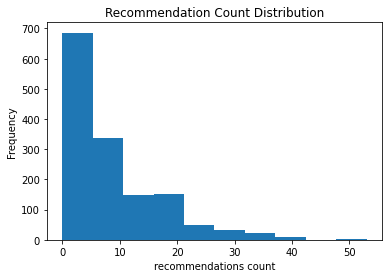

In [356]:
user_df["recommendations_count"].plot.hist()
plt.xlabel("recommendations count")
plt.title("Recommendation Count Distribution")

In [357]:
user_df["recommendations_count"].quantile(np.linspace(.1, 1, 9, 0))


0.1     1.0
0.2     2.0
0.3     3.0
0.4     4.0
0.5     6.0
0.6     8.0
0.7    10.0
0.8    15.0
0.9    21.0
Name: recommendations_count, dtype: float64

In [368]:
# users with above 10% hit rate
user_df[user_df["is_hit"]>.1]

,user,i_have,i_had,has_experienced,i_want,Cloud (Eau de Parfum),For Her Pure Musc (Eau de Parfum),Zara Emotions N°01 - Vetiver Pamplemousse (Eau de Parfum),Vanilla | 28,Replica - By the Fireplace,...,Oud Satin Mood (Eau de Parfum),Eau de Soleil Blanc,Black Afgano (Extrait de Parfum),Obsession (Eau de Parfum),Un Jardin sur le Nil,Angel (Eau de Parfum),For Her (Eau de Toilette),recommendations,is_hit,recommendations_count
1,Ed3n,"['Cloud (Eau de Parfum)', 'R.E.M.', 'Omnia Cry...","['Sun Delight', 'Soft (Perfume Oil)', 'Golden ...","[Angels' Share, Pink Molécule 090·09, Nivea Su...","[Paris La Havane, Ana Abiyedh (Eau de Parfum),...",1,1,1,1,1,...,0,-1,0,0,0,0,0,"[Chloé (2007) (Eau de Parfum), Choco Musk (Eau...",0.400000,5
6,Kleannor,"['Gentleman Givenchy Réserve Privée', ""Encre N...","['Quasar (Eau de Toilette)', 'Horizon (Eau de ...","[Tuscan Leather (Eau de Parfum), masculin Plur...","[Zara Rain N°02 - Bergamot & Leather Spritz, V...",0,0,0,0,0,...,0,0,0,0,0,0,0,"[The One for Men (Eau de Parfum), Explorer, Di...",0.142857,7
29,Jnsn,"['Enigma Parfum Cologne', 'Aphrodisiac Café', ...",['Enigma pour Homme / Creation-E pour Homme (P...,"[Jubilation XXV Man, Luna Rossa Black, Sauvage...","[Excellent Men, You Or Someone Like You, Escap...",0,0,0,0,1,...,-1,0,0,0,0,0,0,"[La Nuit de L'Homme Bleu Électrique, Layton, S...",0.200000,35
37,JosephAzzato,"['Signature (Eau de Parfum)', 'Signature Leath...","['Voyage N-83', ""Déclaration d'Un Soir"", 'Deep...","[Signature Leather Tabac, Club de Nuit Intense...","[Lavande (Eau de Parfum), Al Areeq Gold, Daloa...",0,0,0,0,1,...,0,0,0,0,0,0,0,"[Grey Flannel (Eau de Toilette), Khamrah / خمر...",0.250000,4
68,Avoirdupois,"['Vibrant Leather (2018) (Eau de Parfum)', 'Ve...","['Jasmin', 'Cobra (Perfume Oil)', 'Eau Sauvage...","[Circus Fantasy, Luxury - Nice Woman, Cobra (E...","[Blessed Baraka, Eros (Eau de Toilette), Spice...",0,0,0,0,0,...,0,0,0,0,0,0,0,"[Eros (Eau de Toilette), Samsara (Eau de Parfu...",0.333333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Bruenen233,"['Iris des Champs (Eau de Parfum)', 'For Her P...","['Teint de Neige (Eau de Parfum)', 'Teint de N...","[Rose, DKNY Women (Energizing Eau de Parfum), ...","[Soavissima, Baghari (Eau de Parfum), III-III ...",0,1,0,0,0,...,0,0,0,0,0,0,1,"[Chloé (2007) (Eau de Parfum), Hypnotic Poison...",0.400000,5
2564,Anika09,"['Blanche Bête - Eau de Peau', 'Musk Therapy',...","['Absolute Aphrodisiac', 'Horchata de Vanille'...","[Angels' Share, Contemporary Blend Collection ...","[Lost In A Dream, Via Cavour 1, Ishq, TriBeCa,...",0,0,0,0,0,...,0,0,0,0,0,0,0,"[Kirkè (Extrait de Parfum), Gris Charnel (Eau ...",0.333333,3
2565,Light2,"['Shooting Stars - Apollonia', ""Infusion d'Iri...",[],"[Cactus Garden, Khaltat Night (Eau de Parfum),...","[Cedrat Boise, Day Dreams, Sunset Glow (Fragra...",0,0,0,0,0,...,1,0,1,0,0,0,0,"[Bleu de Chanel (Eau de Parfum), Wūlóng Chá (E...",0.250000,4
2572,Kikstrrr,"['Strawberry Pound Cake', 'Baccarat Rouge 540 ...","['Twisted Peppermint', 'Coco Mademoiselle (Eau...","[gentle Fluidity (Gold), Roses de Chloé, Her (...","[Angels' Share, gentle Fluidity (Gold), Bake, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,"[Collection Extraordinaire - Orchidée Vanille,...",0.200000,5
